In [1]:
!pip install pyspark
import pandas as pd
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. Read the given CSV file

2. Show the first 5 elements of your dataset

3. Count the number of observations in the given dataset

4. Show the Schema of your dataset

5. Drop the column "b" from your dataset

6. Round all of the numerical columns into two decimal places

7. Create a new column (Age10)  with a 10% increase of 'age' column

8. Plot Age10 column on a 2D Plot

9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)

9. Convert  Spark Dataframe to Pandas Dataframe

10. Show the last 5 rows of Pandas DataFrame

For this lab, the Boston Housing dataset has been provided 

In [2]:
from pyspark.sql.functions import round, col

In [3]:
from pyspark.sql import SparkSession

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
s1 = SparkSession.builder.appName('practise').getOrCreate()

In [6]:
s1

In [7]:
from google.colab import files
path = r'/content/drive/MyDrive/Colab Notebooks/BostonHousing.csv'

In [8]:
# s1df = spark.read.csv(path, header=True, inferSchema=True)

In [9]:
s1df = s1.read.option('header','true').csv(path, inferSchema=True)

1. CRIM - per capita crime rate by town.
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3.INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. NOX - nitric oxides concentration (parts per 10 million).
6. RM - average number of rooms per dwelling.
7. AGE - proportion of owner-occupied units built prior to 1940.
8. DIS - weighted distances to five Boston employment centres.
9. RAD - index of accessibility to radial highways.
10. TAX - full-value property-tax rate per 10,000 USD.
11. PTRATIO - pupil-teacher ratio by town.
12. B - 1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT - % lower status of the population.
14. MEDV - Median value of owner-occupied homes in 1000's USD.

In [10]:
s1df.show(5)

+---------------+--------------+---------------+---------------+------------+--------------+-------------------+----------------------+------------+----------+-------+-----------+------------+----+
|crime_percapita|oversized_lots|nonretail_acres|coastal_housing|nitric_oxide|avg_rooms_unit|prior1940_ownerstay|wtdistance_workcenters|rad_highways|tax_10kUSD|ptratio|prop_blacks|lower_status|medv|
+---------------+--------------+---------------+---------------+------------+--------------+-------------------+----------------------+------------+----------+-------+-----------+------------+----+
|        0.00632|          18.0|           2.31|              0|       0.538|         6.575|               65.2|                  4.09|           1|       296|   15.3|      396.9|        4.98|24.0|
|        0.02731|           0.0|           7.07|              0|       0.469|         6.421|               78.9|                4.9671|           2|       242|   17.8|      396.9|        9.14|21.6|
|        0

In [11]:
type(s1df)

pyspark.sql.dataframe.DataFrame

In [12]:
s1df.printSchema()

root
 |-- crime_percapita: double (nullable = true)
 |-- oversized_lots: double (nullable = true)
 |-- nonretail_acres: double (nullable = true)
 |-- coastal_housing: integer (nullable = true)
 |-- nitric_oxide: double (nullable = true)
 |-- avg_rooms_unit: double (nullable = true)
 |-- prior1940_ownerstay: double (nullable = true)
 |-- wtdistance_workcenters: double (nullable = true)
 |-- rad_highways: integer (nullable = true)
 |-- tax_10kUSD: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- prop_blacks: double (nullable = true)
 |-- lower_status: double (nullable = true)
 |-- medv: double (nullable = true)



In [13]:
# A dataframe is a 2 dimensional data structure

In [14]:
s1df.head(3)

[Row(crime_percapita=0.00632, oversized_lots=18.0, nonretail_acres=2.31, coastal_housing=0, nitric_oxide=0.538, avg_rooms_unit=6.575, prior1940_ownerstay=65.2, wtdistance_workcenters=4.09, rad_highways=1, tax_10kUSD=296, ptratio=15.3, prop_blacks=396.9, lower_status=4.98, medv=24.0),
 Row(crime_percapita=0.02731, oversized_lots=0.0, nonretail_acres=7.07, coastal_housing=0, nitric_oxide=0.469, avg_rooms_unit=6.421, prior1940_ownerstay=78.9, wtdistance_workcenters=4.9671, rad_highways=2, tax_10kUSD=242, ptratio=17.8, prop_blacks=396.9, lower_status=9.14, medv=21.6),
 Row(crime_percapita=0.02729, oversized_lots=0.0, nonretail_acres=7.07, coastal_housing=0, nitric_oxide=0.469, avg_rooms_unit=7.185, prior1940_ownerstay=61.1, wtdistance_workcenters=4.9671, rad_highways=2, tax_10kUSD=242, ptratio=17.8, prop_blacks=392.83, lower_status=4.03, medv=34.7)]

In [15]:
print(s1df.columns)

['crime_percapita', 'oversized_lots', 'nonretail_acres', 'coastal_housing', 'nitric_oxide', 'avg_rooms_unit', 'prior1940_ownerstay', 'wtdistance_workcenters', 'rad_highways', 'tax_10kUSD', 'ptratio', 'prop_blacks', 'lower_status', 'medv']


In [16]:
s1df.select('crime_percapita').show(3)

+---------------+
|crime_percapita|
+---------------+
|        0.00632|
|        0.02731|
|        0.02729|
+---------------+
only showing top 3 rows



In [17]:
s1df.select(['crime_percapita','tax_10kUSD']).show(3)

+---------------+----------+
|crime_percapita|tax_10kUSD|
+---------------+----------+
|        0.00632|       296|
|        0.02731|       242|
|        0.02729|       242|
+---------------+----------+
only showing top 3 rows



In [18]:
s1df.dtypes

[('crime_percapita', 'double'),
 ('oversized_lots', 'double'),
 ('nonretail_acres', 'double'),
 ('coastal_housing', 'int'),
 ('nitric_oxide', 'double'),
 ('avg_rooms_unit', 'double'),
 ('prior1940_ownerstay', 'double'),
 ('wtdistance_workcenters', 'double'),
 ('rad_highways', 'int'),
 ('tax_10kUSD', 'int'),
 ('ptratio', 'double'),
 ('prop_blacks', 'double'),
 ('lower_status', 'double'),
 ('medv', 'double')]

In [19]:
s1df.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|   crime_percapita|    oversized_lots|   nonretail_acres|   coastal_housing|       nitric_oxide|    avg_rooms_unit|prior1940_ownerstay|wtdistance_workcenters|     rad_highways|        tax_10kUSD|           ptratio|       prop_blacks|      lower_status|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|                506|             

In [20]:
for i in s1df.columns:
  s1df = s1df.withColumn(i, round(i,2))

In [21]:
s1df.limit(3).toPandas()

,crime_percapita,oversized_lots,nonretail_acres,coastal_housing,nitric_oxide,avg_rooms_unit,prior1940_ownerstay,wtdistance_workcenters,rad_highways,tax_10kUSD,ptratio,prop_blacks,lower_status,medv
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,392.83,4.03,34.7


In [22]:
s1df = s1df.drop('b')

In [23]:
s1df.limit(5).toPandas()

,crime_percapita,oversized_lots,nonretail_acres,coastal_housing,nitric_oxide,avg_rooms_unit,prior1940_ownerstay,wtdistance_workcenters,rad_highways,tax_10kUSD,ptratio,prop_blacks,lower_status,medv
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2


In [24]:
s1df = s1df.withColumn('Age10', round((s1df.prior1940_ownerstay)+(s1df.prior1940_ownerstay/10), 2))

In [25]:
s1df.limit(5).toPandas()

,crime_percapita,oversized_lots,nonretail_acres,coastal_housing,nitric_oxide,avg_rooms_unit,prior1940_ownerstay,wtdistance_workcenters,rad_highways,tax_10kUSD,ptratio,prop_blacks,lower_status,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,392.83,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2,59.62


In [26]:
s1df.count()

506

In [27]:
s1df = s1df.toPandas()

In [28]:
s1df.head(5)

,crime_percapita,oversized_lots,nonretail_acres,coastal_housing,nitric_oxide,avg_rooms_unit,prior1940_ownerstay,wtdistance_workcenters,rad_highways,tax_10kUSD,ptratio,prop_blacks,lower_status,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,392.83,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2,59.62


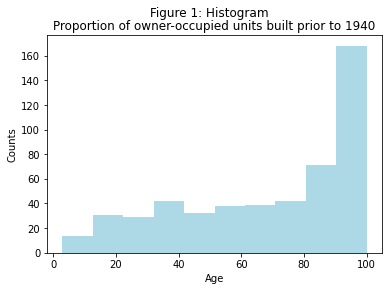

In [29]:
ax1 = s1df['prior1940_ownerstay'].plot(kind='hist', bins=10, facecolor='lightblue')
ax1.set_title('Proportion of owner-occupied units built prior to 1940')
ax1.set_xlabel('Age')
ax1.set_ylabel('Counts')
plt.suptitle('Figure 1: Histogram')
plt.show()

In [30]:
s1df.tail()

,crime_percapita,oversized_lots,nonretail_acres,coastal_housing,nitric_oxide,avg_rooms_unit,prior1940_ownerstay,wtdistance_workcenters,rad_highways,tax_10kUSD,ptratio,prop_blacks,lower_status,medv,Age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,396.90,7.88,11.9,88.88
